In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
ind_variables = 5
data      = []
mu_list, sigma_list, samples = np.random.randint(-5, 5, size=ind_variables) , np.random.rand(ind_variables), 1000000 # mean, standard deviation and number of samples
for v in range(ind_variables):
    data.append(np.random.normal(mu_list[v], sigma_list[v], samples))
data.append(data[2] + 3 * data[1])
variables = len(data)


In [21]:
x_min, x_max = np.floor(min([d.min() for d in data])), np.ceil(max([d.max() for d in data]))

bar_number = 500.0
bar_width  = (x_max - x_min) / bar_number

In [22]:
x_values, cdfs, pdfs = [], [[] for i in range(variables)], [[] for i in range(variables)]
cdf_last = [0 for i in range(variables)]

for x in np.arange(x_min, x_max, bar_width):
    x_values.append(x)
    for i, series in enumerate(data):
        cdf      = len( [d for d in series if d < x ] ) / samples
        pdf      = (cdf - cdf_last[i]) / bar_width
        cdf_last[i] = cdf
       
        pdfs[i].append(pdf)
        cdfs[i].append(cdf)
   


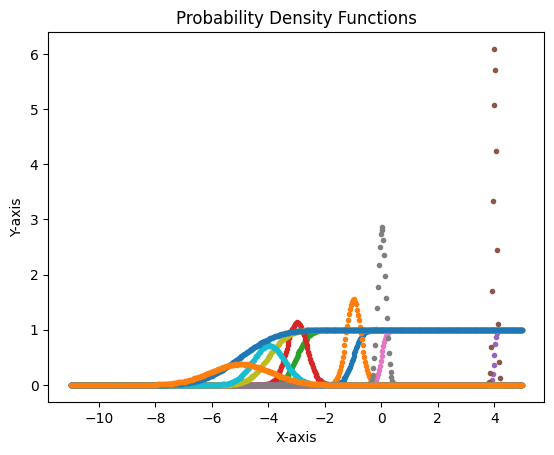

In [23]:
plt.title('Probability Density Functions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

for i in range(variables):
    plt.scatter(x_values, cdfs[i], label='cdf', marker='.')
    plt.scatter(x_values, pdfs[i], label='pdf', marker='.')


# Show the plot
plt.show()

In [24]:
# Expectations
E = [sum(series)/len(series) for series in data]


In [25]:
cov = np.zeros((variables, variables))
for i, series1 in enumerate(data):
    for j, series2 in enumerate(data):
        cov[i,j] = sum((series1 - E[i]) * (series2 - E[j])) / len(series1)


In [39]:
np.round(cov,4)
eigen_values, eigen_vectors = np.linalg.eig(cov)

In [41]:
np.round(eigen_vectors,2)

array([[-0.  ,  0.  ,  1.  , -0.  ,  0.  ,  0.  ],
       [ 0.32,  0.  , -0.  ,  0.  ,  0.29, -0.9 ],
       [ 0.  ,  0.  ,  0.  , -0.  , -0.95, -0.3 ],
       [-0.  ,  0.  ,  0.  ,  1.  , -0.  , -0.  ],
       [-0.  ,  1.  , -0.  , -0.  ,  0.  , -0.  ],
       [ 0.95,  0.  ,  0.  ,  0.  , -0.09,  0.3 ]])